In [1]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-extra is already the newest version (2017.20180305-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt

In [2]:
from matplotlib import rc

# change the text format as same as that in the report
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':30})
rc('text', usetex=True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

from scipy.sparse import diags
from scipy.sparse.linalg import inv 
from sympy import DiracDelta

In [4]:
# Approximation of \sigma(x-a)
def DiracApprox(x, a, eps):
  len_x = np.size(x)
  i_x = np.zeros(len_x)
  for j in range(len_x):
    if x[j] > a - eps and x[j] < a + eps:
      i_x[j] = 1 + np.cos(np.pi * x[j] / eps) / (2 * eps)
  return i_x

# initial condition function using multiple Dirac Delta function
def I(x, eps):
    l_m = L / (m_ + 1)
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    for i in range(1, len_x - 1):
      if x[i] % l_m == 0:
        cont_pos = x[i]
        i_x += DiracApprox(x, cont_pos, eps)
    return i_x


# exact solution
def U_exact(x, t):
    u_ex = np.ones(np.size(x)) * (m_/L)
    
    for n in range(1, 2000):
      c_n = 0
      for i in range(1, m_ + 1):
        c_n += 2 * np.cos(n * np.pi * i/ (m_ + 1)) / L
        
      u_ex += c_n * np.cos(n * np.pi * x / L) * np.exp(-D * n ** 2 * np.pi ** 2 * t / L ** 2)
        
    return u_ex

In [5]:
L=10; T=10; m_ = 4; D = 1; eps = 1/75

#made spaces and gaps depend on L and T to keep resolution the same when increasing time/length
Nx_spaces = 40*L; Nt_gaps = 50*T; 
Nx_points = Nx_spaces +  1 ; Nt_points = Nt_gaps + 1

x = np.linspace(0, L, Nx_points)   # mesh points in space
dx = x[1] - x[0]

t = np.linspace(0, T, Nt_points) # mesh points in time
dt = t[1] - t[0]

C = dt/dx**2
print("dx=",dx,"dt=", dt,"C =",C)

# set up matrices
u   = np.zeros(Nx_points)
u_old = np.zeros(Nx_points)

U = np.zeros((Nx_points,Nt_points))
U_ex = np.zeros((Nx_points, Nt_points))

# Data structures for the linear system
A = np.zeros((Nx_points, Nx_points))
b = np.zeros(Nx_points)

# set up the matrix A
for i in range(1, Nx_points-1): # rows from 1 to Nx-2
    A[i,i-1] = -C
    A[i,i+1] = -C
    A[i,i] = 1 + 2*C
A[0,0] = 1+2*C  ; A[0,1]= -2*C 
A[Nx_points-1,Nx_points-1] = 1+2*C 
A[Nx_points-1,Nx_points-2] = -2*C

# find the inverse of A and use for all points
Ainv = np.linalg.inv(A)

# Set initial condition u(x,0) = I(x, eps)
u_old = I(x, eps) # no dirichlet boundary conditions in this example

# initialise matrices U and U_ex2 for first time step
U[:,0] = u_old[:]
U_ex[:,0]=U_exact(x,0)

#perform time=stepping
for n in range(1, Nt_points): # timestep for 1 to t = T-1 so last step finishes on t=T
    # Compute b and solve linear system
    b[:] = u_old[:]
    u[:] = np.dot(Ainv,b)
    # Update u_1 before next step
    u_old = u
    U[:,n] = u
    U_ex[:,n]=U_exact(x,t[n])


dx= 0.025 dt= 0.02 C = 31.999999999999993


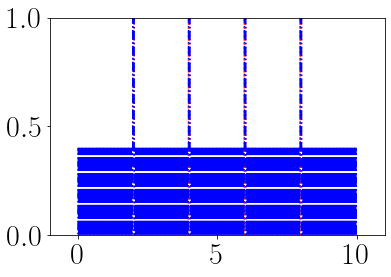

In [6]:
# set up animation plots
fig, ax = plt.subplots()
ax.axis([-1, 1+L,0, 1])
def animate(i):
    l.set_data(x, U[:,i])
    m.set_data(x,U_ex[:,i])
    
ax.axis([-1, 1+L, 0, 1])
l, = ax.plot([],[],':r')
m, = ax.plot([],[],'-.b')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, frames=Nt_points)

from IPython.display import HTML
HTML(ani2.to_jshtml())

In [7]:
np.array([1, 2, 3]) + np.array([1, 2, 3])

array([2, 4, 6])

time = 0.2s


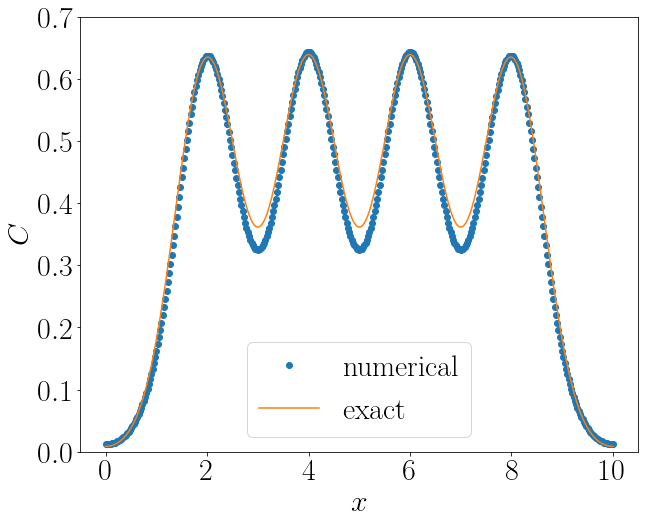

In [8]:
times = np.linspace(0, Nt_gaps, T * 100, dtype = int)
print(f'time = {t[times[20]]}s')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.xlim([-0.5, 10.5])
plt.ylim([0.0, 0.7])

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax.set(xlabel='$x$', ylabel='$C$')
ax.plot(x, U[:, times[20]],'o')
ax.plot(x, U_ex[:, times[20]])
plt.legend(['numerical', 'exact'])
plt.savefig('dd_1.pdf', bbox_inches='tight')
plt.show()

time = 1.0s


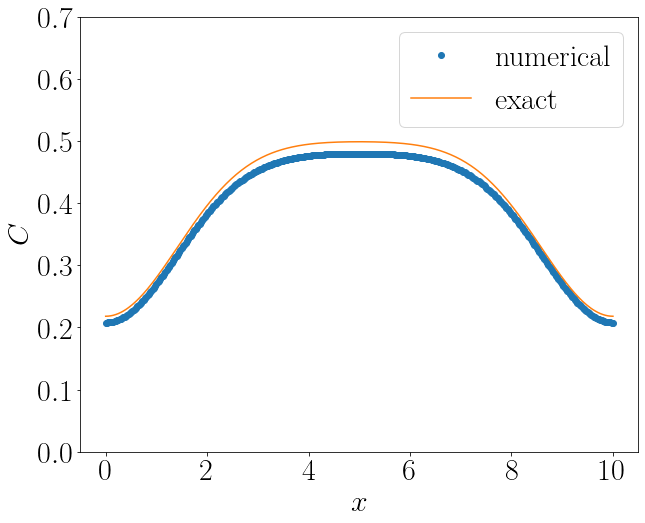

In [9]:
print(f'time = {t[times[100]]}s')

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.xlim([-0.5, 10.5])
plt.ylim([0.0, 0.7])

ax.set(xlabel='$x$', ylabel='$C$')
ax.plot(x, U[:, times[100]],'o')
ax.plot(x, U_ex[:, times[100]])
plt.legend(['numerical', 'exact'])
plt.savefig('dd_2.pdf', bbox_inches='tight')
plt.show()

10.0


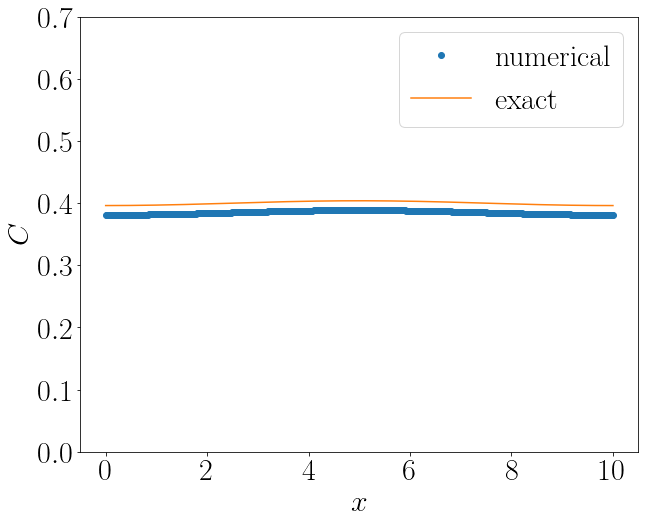

In [10]:
print(t[times[-1]])

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.xlim([-0.5, 10.5])
plt.ylim([0.0, 0.7])

ax.set(xlabel='$x$', ylabel='$C$')
ax.plot(x, U[:, times[-1]],'o')
ax.plot(x, U_ex[:, times[-1]])
plt.legend(['numerical', 'exact'])
plt.savefig('dd_3.pdf', bbox_inches='tight')
plt.show()